In [0]:
# install packages
! pip install spacy
! pip install wordcloud
! python -m spacy download en

In [2]:
# upload files for analysis
from google.colab import files
! mkdir Texts
% cd Texts
uploaded = files.upload()
% cd ..

/content/Texts


Saving 24-year-old woman charged in death of 3 siblings killed by truck at Indiana bus stop.txt to 24-year-old woman charged in death of 3 siblings killed by truck at Indiana bus stop.txt
Saving Adding USB-C to the iPad isn’t enough to fix Apple’s messy port strategy.txt to Adding USB-C to the iPad isn’t enough to fix Apple’s messy port strategy.txt
Saving Dow Posts Solid Gains as GM and Facebook Lift Stocks.txt to Dow Posts Solid Gains as GM and Facebook Lift Stocks.txt
Saving In Campaign Sprint, Trump's Focus On Immigration Not A Winner For All GOP Candidates.txt to In Campaign Sprint, Trump's Focus On Immigration Not A Winner For All GOP Candidates.txt
Saving More than 20 million early votes cast so far, as women, older voters lead the way.txt to More than 20 million early votes cast so far, as women, older voters lead the way.txt
Saving Obesity, low BMI linked to increased risk of death, study reveals.txt to Obesity, low BMI linked to increased risk of death, study reveals.txt
Savi

In [0]:
# import packages for assignment
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.probability import FreqDist
from os import listdir
from os.path import isfile, join

In [0]:
# collect paths to documents
folder = './Texts/'
filenames = [f for f in listdir(folder) if isfile(join(folder, f))]
textfiles = [folder+f for f in listdir(folder) if isfile(join(folder, f))]

In [0]:
# extract texts and store in a list
docs = []
for f in textfiles:
    with open(f, 'r', encoding='utf-8-sig') as inputfile:
        docs.append(inputfile.read())

In [0]:
# load spacy model
nlp = spacy.load('en')

In [0]:
# function that converts text to list of named entities
def textNER(text):
  doc = nlp(text)
  ne = []
  typene = []
  for ent in doc.ents:
    ne.append(ent.text)
    typene.append(ent.label_)
  return ne, typene

# function that generates a wordcloud from a list of named entities
def wcloud(ents, minfreq=1):
  fdist = FreqDist(ents)
  tmp = {}
  for k in fdist:
    if fdist[k] >= minfreq:
      tmp[k] = fdist[k]
  wordcloud = WordCloud(width=800, height=400)
  wordcloud.generate_from_frequencies(frequencies=tmp)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()
  return list(tmp.keys())

In [14]:
# check document lengths
for d in docs:
  print(len(d))

3999
4938
6229
1420
8820
8665
6579
8079
5549
3777


In [0]:
# extact named entities from documents
docNEs = []
typeNEs = []
for d in docs:
  ne, t = textNER(d)
  docNEs.append(ne)
  typeNEs.append(t)

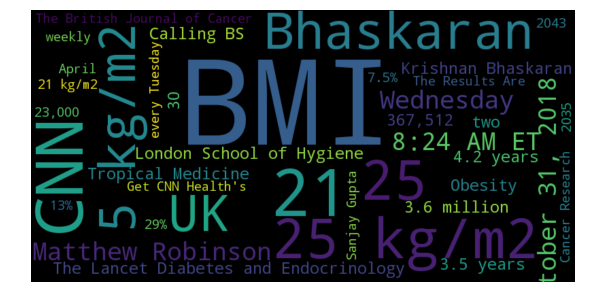

"Obesity, low BMI linked to increased risk of death, study reveals", 
	variety of entity types: 9


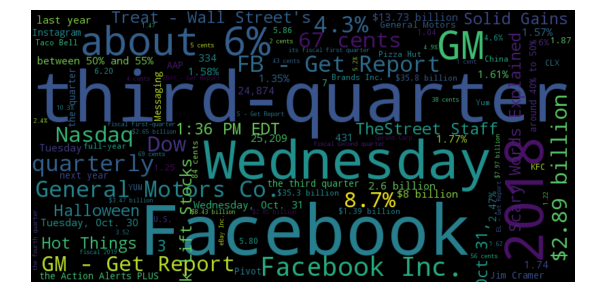

"Dow Posts Solid Gains as GM and Facebook Lift Stocks", 
	variety of entity types: 11


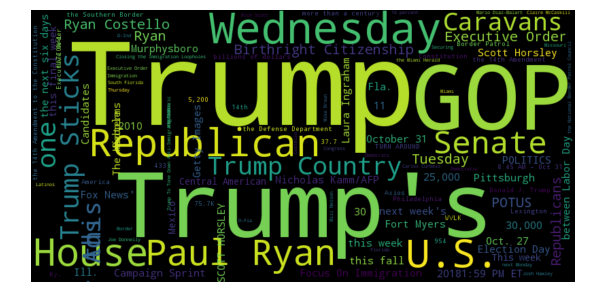

"In Campaign Sprint, Trump's Focus On Immigration Not A Winner For All GOP Candidates", 
	variety of entity types: 15


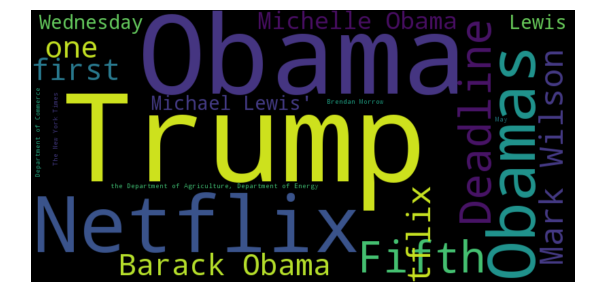

"The Obamas might make a TV show about disorder in the Trump administration for Netflix", 
	variety of entity types: 7


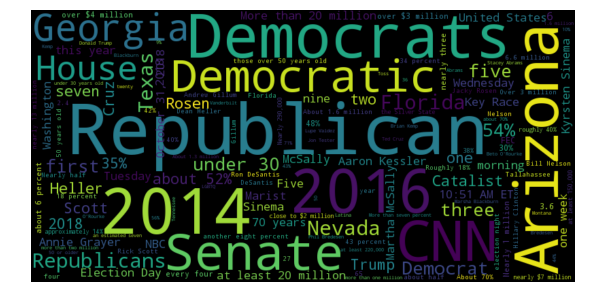

"More than 20 million early votes cast so far, as women, older voters lead the way", 
	variety of entity types: 12


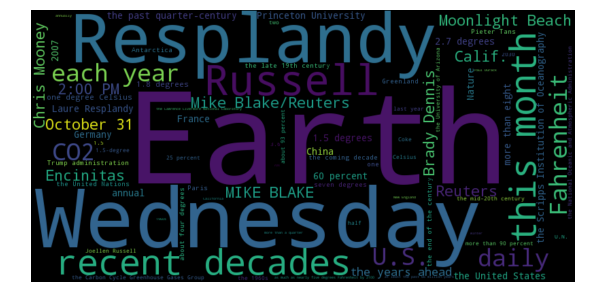

"Startling new research finds large buildup of heat in the oceans, suggesting a faster rate of global warming", 
	variety of entity types: 11


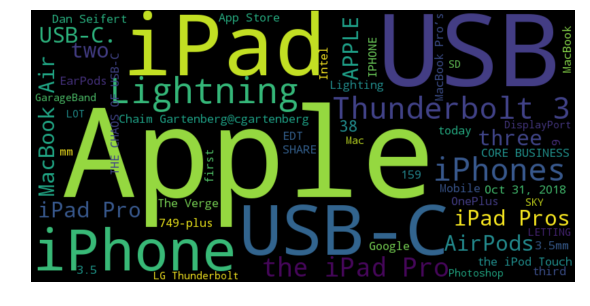

"Adding USB-C to the iPad isn’t enough to fix Apple’s messy port strategy", 
	variety of entity types: 14


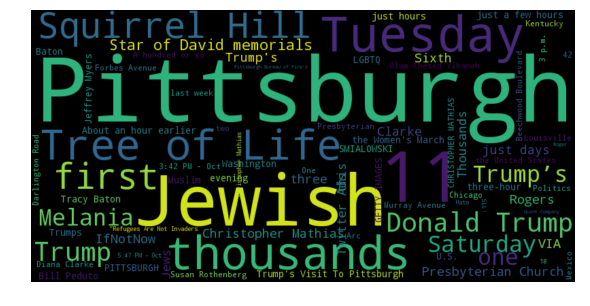

"Trump’s Visit To Pittsburgh — A City That Didn’t Want Him", 
	variety of entity types: 14


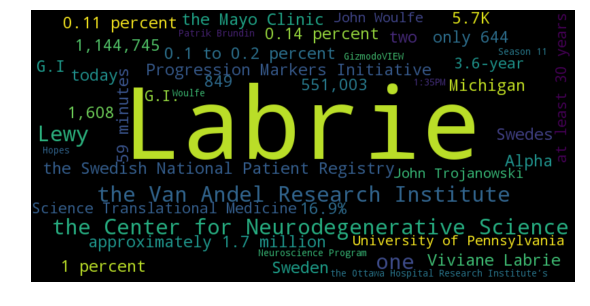

"Scientists Find Link Between Parkinson's Disease and the Appendix", 
	variety of entity types: 8


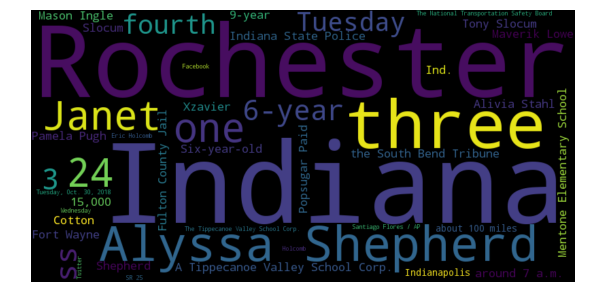

"24-year-old woman charged in death of 3 siblings killed by truck at Indiana bus stop", 
	variety of entity types: 10


In [16]:
# generate named entity wordclouds for each document
for n, f, lab in zip(docNEs, filenames, typeNEs):
  wcloud(n)
  print('"'+f.replace('.txt', '')+'",', '\n\tvariety of entity types:', len(set(lab)))

This method of summarization is not efficient for documents with very few named entities. In particular, it is difficult to summarize the obesity, ocean, Parkinson's and truck accident articles. Most of these are more scientific documents and have fewer topic-related named entities. This shows that having fewer entities provides inferior summarization.

However, it is easy to determine what some of the summaries of the national news documents are if you follow the news. It also seems to be fairly easy to determine the genre, domain, and topic.

Next, let's look at named entities that appear in each document at least twice.

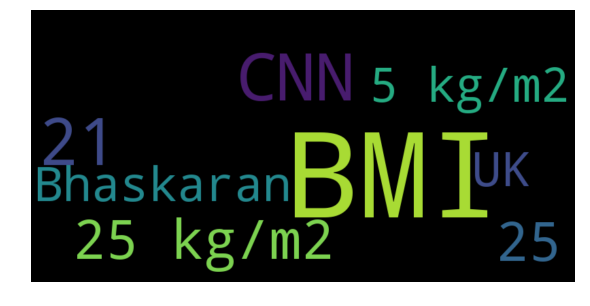

"Obesity, low BMI linked to increased risk of death, study reveals", 
	variety of entity types: 5


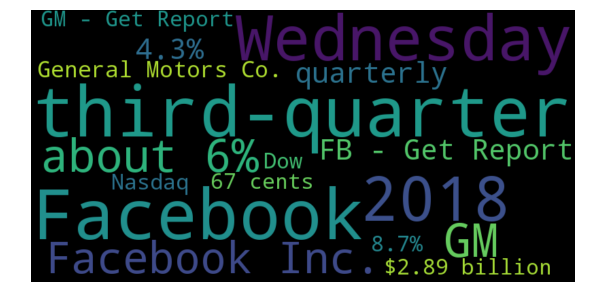

"Dow Posts Solid Gains as GM and Facebook Lift Stocks", 
	variety of entity types: 7


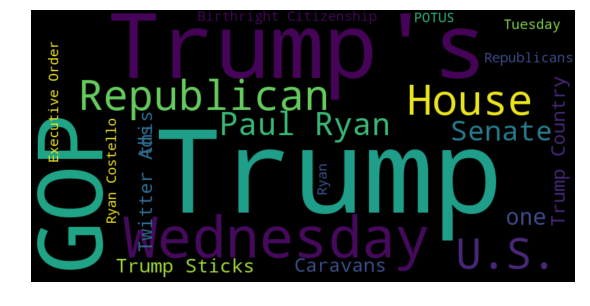

"In Campaign Sprint, Trump's Focus On Immigration Not A Winner For All GOP Candidates", 
	variety of entity types: 8


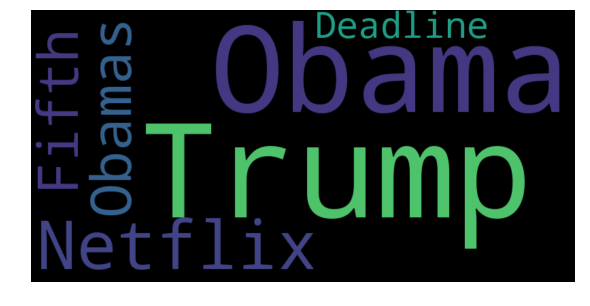

"The Obamas might make a TV show about disorder in the Trump administration for Netflix", 
	variety of entity types: 5


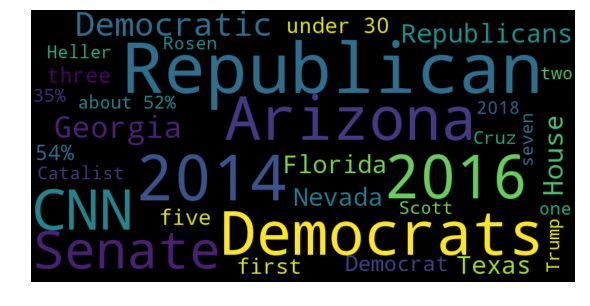

"More than 20 million early votes cast so far, as women, older voters lead the way", 
	variety of entity types: 9


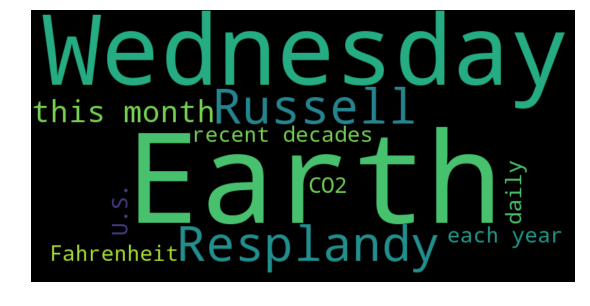

"Startling new research finds large buildup of heat in the oceans, suggesting a faster rate of global warming", 
	variety of entity types: 5


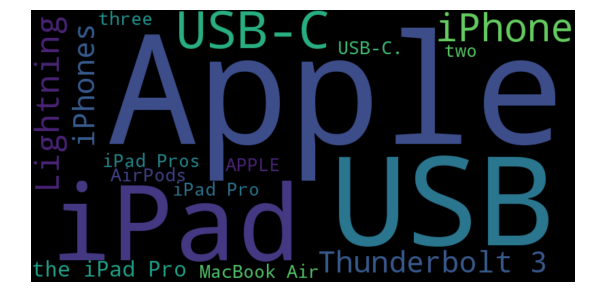

"Adding USB-C to the iPad isn’t enough to fix Apple’s messy port strategy", 
	variety of entity types: 9


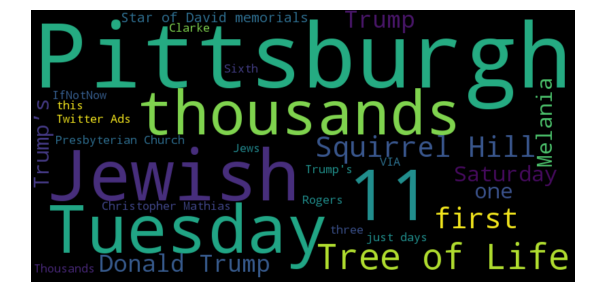

"Trump’s Visit To Pittsburgh — A City That Didn’t Want Him", 
	variety of entity types: 11


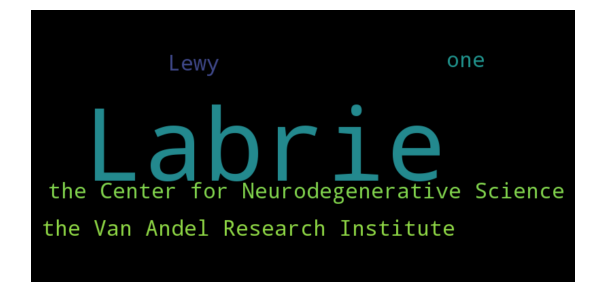

"Scientists Find Link Between Parkinson's Disease and the Appendix", 
	variety of entity types: 4


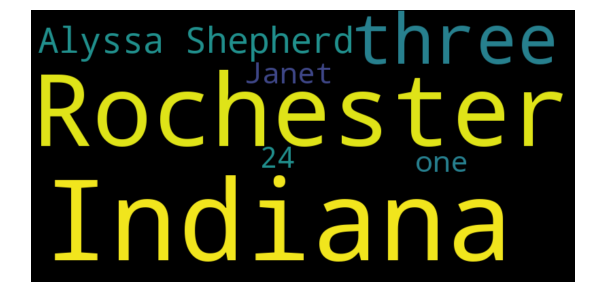

"24-year-old woman charged in death of 3 siblings killed by truck at Indiana bus stop", 
	variety of entity types: 4


In [17]:
# generate named entity wordclouds for each document
# keep named entities that appear at least twice
for n, f, lab in zip(docNEs, filenames, typeNEs):
  ne = wcloud(n, 2) # need higher frequency
  # update list of entity types
  t = list(zip([e in ne for e in n], lab)) 
  t = [ne[1] for ne in t if ne[0]]
  print('"'+f.replace('.txt', '')+'",', '\n\tvariety of entity types:', len(set(t)))

The quality of summarization appears to be very similar. The word clouds here are less crowded making it easier to see the main ideas without being distracted by the much smaller text. However, it becomes more difficult to identify the genre with so few entities. The topic and domain still remain apparent.

In [12]:
# look at entity types 
for f, lab in zip(filenames, typeNEs):
  print('"'+f.replace('.txt', '')+'",', '\n\tentity types:', set(lab))

"Obesity, low BMI linked to increased risk of death, study reveals", 
	entity types: {'GPE', 'ORG', 'WORK_OF_ART', 'DATE', 'PRODUCT', 'PERSON', 'CARDINAL', 'QUANTITY', 'PERCENT'}
"Dow Posts Solid Gains as GM and Facebook Lift Stocks", 
	entity types: {'GPE', 'ORG', 'MONEY', 'DATE', 'EVENT', 'PERSON', 'CARDINAL', 'FAC', 'TIME', 'NORP', 'PERCENT'}
"In Campaign Sprint, Trump's Focus On Immigration Not A Winner For All GOP Candidates", 
	entity types: {'GPE', 'LAW', 'ORG', 'PERCENT', 'DATE', 'LOC', 'PRODUCT', 'PERSON', 'EVENT', 'CARDINAL', 'ORDINAL', 'FAC', 'TIME', 'NORP', 'MONEY'}
"The Obamas might make a TV show about disorder in the Trump administration for Netflix", 
	entity types: {'GPE', 'ORG', 'DATE', 'PERSON', 'CARDINAL', 'ORDINAL', 'NORP'}
"More than 20 million early votes cast so far, as women, older voters lead the way", 
	entity types: {'GPE', 'ORG', 'PERCENT', 'DATE', 'PERSON', 'CARDINAL', 'EVENT', 'ORDINAL', 'FAC', 'TIME', 'NORP', 'MONEY'}
"Startling new research finds large 

Let's keep only a few types of named entities.

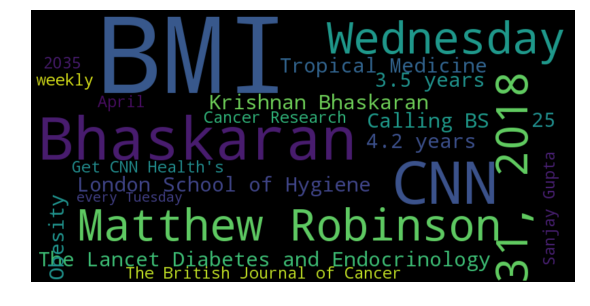

"Obesity, low BMI linked to increased risk of death, study reveals", 	
variety of entity types: 3


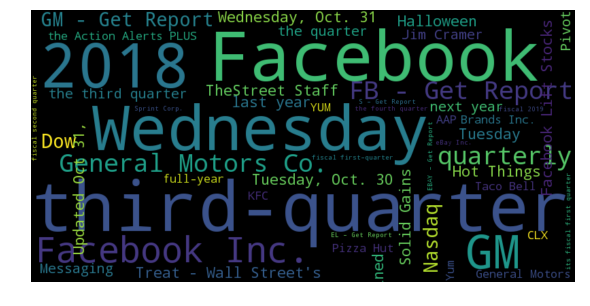

"Dow Posts Solid Gains as GM and Facebook Lift Stocks", 	
variety of entity types: 5


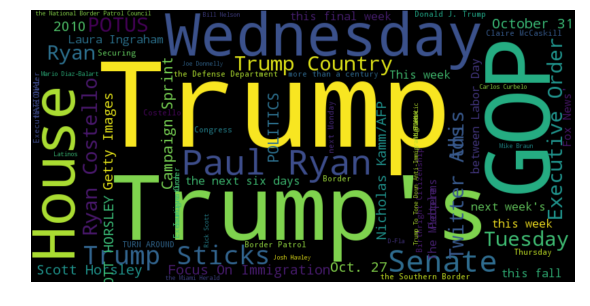

"In Campaign Sprint, Trump's Focus On Immigration Not A Winner For All GOP Candidates", 	
variety of entity types: 5


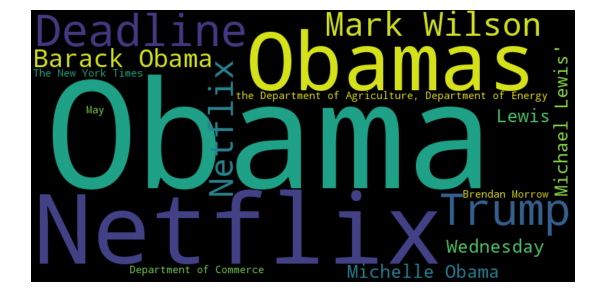

"The Obamas might make a TV show about disorder in the Trump administration for Netflix", 	
variety of entity types: 3


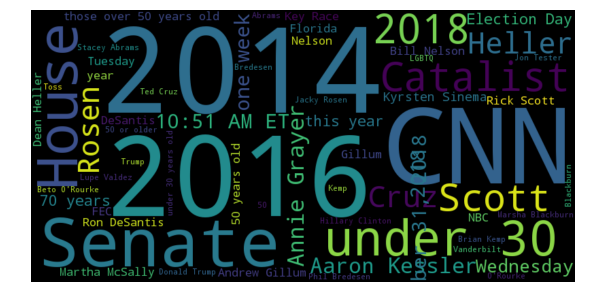

"More than 20 million early votes cast so far, as women, older voters lead the way", 	
variety of entity types: 5


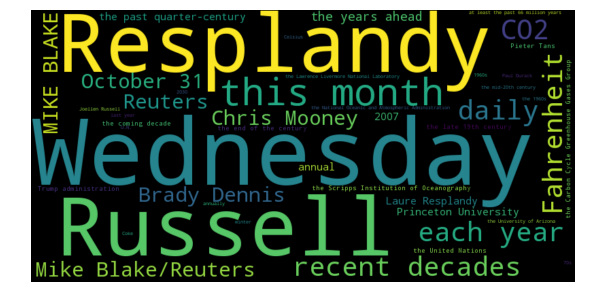

"Startling new research finds large buildup of heat in the oceans, suggesting a faster rate of global warming", 	
variety of entity types: 4


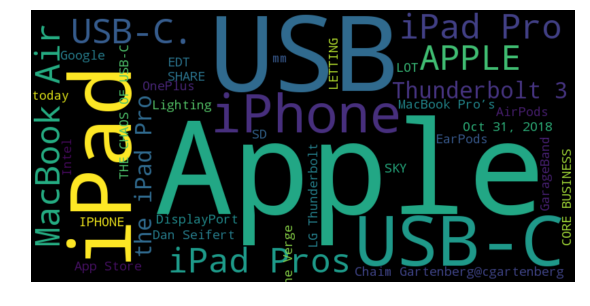

"Adding USB-C to the iPad isn’t enough to fix Apple’s messy port strategy", 	
variety of entity types: 5


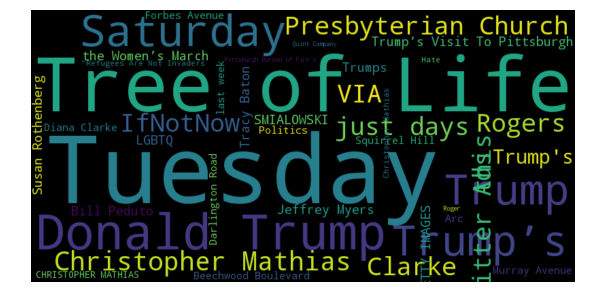

"Trump’s Visit To Pittsburgh — A City That Didn’t Want Him", 	
variety of entity types: 5


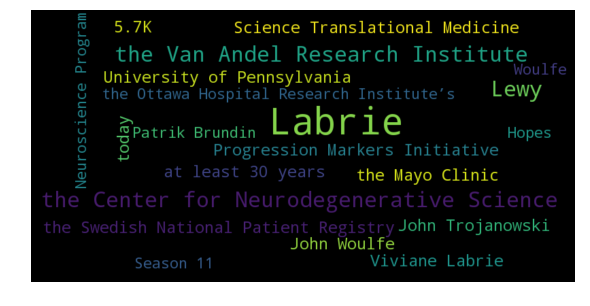

"Scientists Find Link Between Parkinson's Disease and the Appendix", 	
variety of entity types: 3


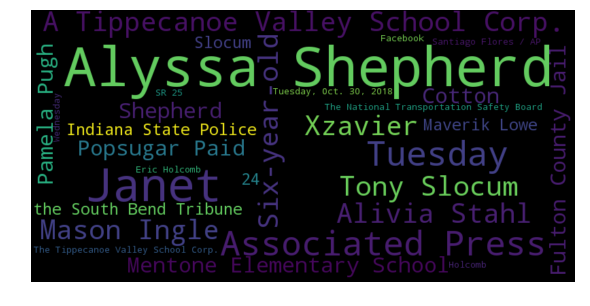

"24-year-old woman charged in death of 3 siblings killed by truck at Indiana bus stop", 	
variety of entity types: 4


In [18]:
keeptypes = ['PERSON', 'ORG', 'EVENT', 'DATE', 'FAC']
# generate named entity wordclouds for each document
# keep named entities that are of certain type
for n, f, lab in zip(docNEs, filenames, typeNEs):
  newne = list(zip(n, [l in keeptypes for l in lab], lab)) 
  # update list of entity types
  t = [ne[2] for ne in newne if ne[1]]
  # update list of named entities
  newne = [ne[0] for ne in newne if ne[1]]
  wcloud(newne, 1)
  print('"'+f.replace('.txt', '')+'",', '\t\nvariety of entity types:', len(set(t)))

When keeping entities of type 'PERSON', 'ORG', 'EVENT', 'DATE',  and 'FAC', we maintain the more important entities. These wordclouds appear better than the previous ones since they show some of the finer relevant details without all of the original named entities.